Running `python3 experiments/run_contact_graph_experiment.py --config-path ../config/WAFR_experiments --config-dir config --config-name reaches_new_sampling`

Where the domination check is reaches new, 1 sample, graph is cg_stackpush_d2, and overestimate l1 norm heuristic is used.

Using project single gcs,
There are 8 instances where the alg failed to proejct the sample for the vertex.

Using project single
There are also 8 instances where the alg failed to project the sample for the vertex.

Doing a text compare, we see that they are the same samples.

Is there something special about these vertices?

In [1]:
import re


def extract_failed_vertices(log_data):
    # Regular expression to match the failed vertices
    vertex_pattern = re.compile(r"Failed to project sample for vertex (\(.*?\))")

    # Find all matches in the log data
    matches = vertex_pattern.findall(log_data)

    return matches


log_data = """
[2024-06-27 15:40:49,244][large_gcs.domination_checkers.sampling_domination_checker][ERROR] - Failed to project sample for vertex ('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')
[2024-06-27 15:40:54,496][large_gcs.domination_checkers.sampling_domination_checker][ERROR] - Failed to project sample for vertex ('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')
[2024-06-27 15:40:59,104][large_gcs.domination_checkers.sampling_domination_checker][ERROR] - Failed to project sample for vertex ('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')
[2024-06-27 15:41:01,250][large_gcs.domination_checkers.sampling_domination_checker][ERROR] - Failed to project sample for vertex ('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')
[2024-06-27 15:41:01,546][large_gcs.domination_checkers.sampling_domination_checker][ERROR] - Failed to project sample for vertex ('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'IC|obj1_f2-rob0_f0', 'NC|obj2_f3-rob0_f1')
"""
vertex_paths = [
    ['source', "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')"],
    ['source', "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')"],
    ['source', "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')"],
    ['source', "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'IC|obj1_f2-rob0_f0', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')"],
    ['source', "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f0-rob0_f2', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'NC|obj0_f0-rob0_f2', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f3-obj1_v1', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'IC|obs0_f2-obj2_f0', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f3-obj0_v1', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'IC|obj1_f2-rob0_f0', 'NC|obj2_f3-rob0_f1')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'IC|obj1_f2-rob0_f0', 'IC|obj2_f2-rob0_f0')", "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'IC|obj1_f2-rob0_f0', 'NC|obj2_f3-rob0_f1')"],
]

In [2]:
failed_vertiex_names = extract_failed_vertices(log_data)
failed_vertiex_names

["('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')",
 "('IC|obs0_f2-obj0_f0', 'IC|obs0_f2-obj1_f0', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')",
 "('IC|obs0_f2-obj0_f0', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f3-rob0_v1', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')",
 "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f2-rob0_f0', 'IC|obj1_f1-obj2_f3', 'NC|obj1_f3-rob0_f1', 'NC|obj2_f3-rob0_f1')",
 "('IC|obs0_f1-obj0_f3', 'NC|obs0_f1-obj1_f3', 'NC|obs0_f1-obj2_f3', 'NC|obs0_f2-rob0_f0', 'IC|obj0_

In [3]:
len(failed_vertiex_names)

5

Let's try visualizing samples in this vertex

In [4]:
from large_gcs.algorithms.gcs_star import GcsStar
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_l2norm_cost_factory_obj_weighted,
)
from large_gcs.graph.cost_constraint_factory import (
    shortcut_edge_cost_factory,
)
from large_gcs.algorithms.search_algorithm import SearchNode
from large_gcs.graph.graph import ShortestPathSolution
from large_gcs.graph.incremental_contact_graph import IncrementalContactGraph
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
)
from large_gcs.graph.graph import Vertex
import numpy as np
from IPython.display import HTML

import ast
import logging

logging.basicConfig(level=logging.WARN)
logging.getLogger("large_gcs").setLevel(logging.DEBUG)
logging.getLogger(__name__).setLevel(logging.DEBUG)
logger = logging.getLogger(__name__)

INFO:large_gcs.graph.contact_graph:Creating vertex costs...


Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-05


100%|██████████| 2/2 [00:00<00:00, 55553.70it/s]
INFO:large_gcs.graph.graph:Adding 2 vertices to graph...
100%|██████████| 2/2 [00:00<00:00, 30615.36it/s]
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 10 body pairs...
100%|██████████| 10/10 [00:00<00:00, 152.59it/s]
INFO:large_gcs.graph.incremental_contact_graph:Calculating adjacent contact pair modes (313)
100%|██████████| 313/313 [00:00<00:00, 40189.10it/s]


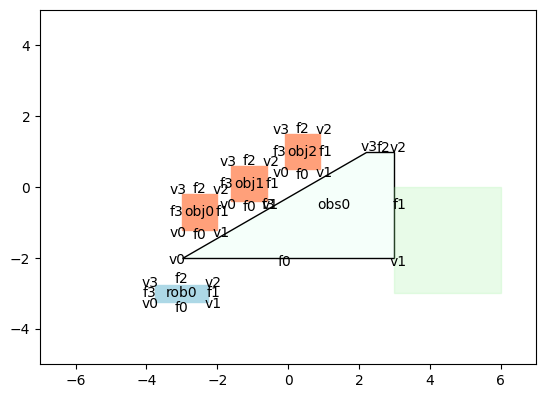

In [5]:
graph_file = ContactGraphGeneratorParams.inc_graph_file_path_from_name(
    "cg_stackpush_d2"
)
cg = IncrementalContactGraph.load_from_file(
    graph_file,
    should_incl_simul_mode_switches=False,
    should_add_const_edge_cost=True,
    should_add_gcs=True,
    should_use_l1_norm_vertex_cost=True,
)
cg.plot()

Construct the contact set for each vertex and add it to the graph.

In [6]:
for path in vertex_paths:
    cg.add_vertex_path_to_graph(path)

In [7]:
from large_gcs.algorithms.search_algorithm import AlgMetrics
from large_gcs.domination_checkers.sampling_domination_checker import SetSamples


n = SearchNode.from_vertex_path(vertex_paths[0])
cg.vertices[n.vertex_name].convex_set._polyhedron.create_nullspace_set()

DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set


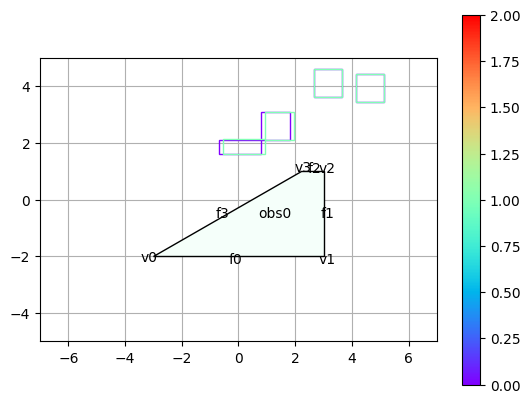

In [8]:
cg.generate_and_plot_samples_in_set(n.vertex_name, 1)

In [9]:
n.vertex_name

"('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2')"

In [10]:
len(n.vertex_path)

6

In [11]:
def find_duplicate_indices(input_list):
    index_dict = {}
    duplicates = {}
    
    for index, item in enumerate(input_list):
        if item in index_dict:
            if item not in duplicates:
                duplicates[item] = [index_dict[item]]
            duplicates[item].append(index)
        else:
            index_dict[item] = index
    
    return duplicates

# Example usage
sample_list = [1, 2, 2, 3, 4, 4, 5, 3]
duplicate_indices = find_duplicate_indices(n.vertex_path)

print("Indices of duplicate items:")
for item, indices in duplicate_indices.items():
    print(f"Item {item} is found at indices: {indices}")


Indices of duplicate items:
Item ('NC|obs0_f3-obj0_v1', 'NC|obs0_f3-obj1_v1', 'NC|obs0_f3-obj2_v1', 'NC|obs0_f3-rob0_v1', 'NC|obj0_f1-obj1_f3', 'NC|obj0_f1-obj2_f3', 'IC|obj0_f3-rob0_f1', 'NC|obj1_f1-obj2_f3', 'NC|obj1_f0-rob0_f2', 'NC|obj2_f0-rob0_f2') is found at indices: [3, 5]


In [12]:
full_set = cg.vertices[n.vertex_name].convex_set._polyhedron
full_set.set.A().shape, full_set.set.b().shape

((75, 19), (75,))

In [13]:
ns_set = cg.vertices[n.vertex_name].convex_set.nullspace_set
ns_set.set.A().shape, ns_set.set.b().shape

((55, 9), (55,))

The samples seem fine, and the sets seem fine, now I'm going to find the particular vertex paths that they were trying to get projected to and see what happens when we plot projected samples.

In [14]:
set_samples = SetSamples.from_vertex(n.vertex_name, cg.vertices[n.vertex_name], 1)
projected_samples = []
for i, s in enumerate(set_samples.samples):
    logger.info(f"projecting sample {i}")
    # Round the sample to 3 decimal places
    s = np.round(s, 3)
    projected_sample = set_samples.project_single(cg, n, s)
    projected_samples.append(projected_sample)
    logger.info(f"Projected Sample: {projected_sample}")

DEBUG:large_gcs.geometry.convex_set:Sampled 1 points from convex set
INFO:__main__:projecting sample 0
INFO:__main__:Projected Sample: [-2.10000000e+00 -2.10000000e+00 -6.92307692e-01 -6.92307692e-01
 -1.10000000e+00 -1.10000000e+00  1.00000000e-01  1.00000000e-01
  4.00000000e-01  4.00000000e-01  1.00000000e+00  1.00000000e+00
 -3.35000000e+00 -3.35000000e+00 -6.50000000e-01 -6.50000000e-01
  8.88178420e-16  3.63231667e-12  4.44089210e-16]


In [15]:
# This method is not currently working because of cycles in the path.
# set_samples = SetSamples.from_vertex(n.vertex_name, cg.vertices[n.vertex_name], 1)
# set_samples.init_graph_for_projection(cg, n, AlgMetrics())
# projected_samples = []
# for i, s in enumerate(set_samples.samples):
#     logger.info(f"projecting sample {i}")
#     # Round the sample to 3 decimal places
#     s = np.round(s, 3)
#     projected_sample = set_samples.project_single_gcs(cg, n, s)
#     projected_samples.append(projected_sample)
#     logger.info(f"{projected_sample}")

In [16]:
# from large_gcs.domination_checkers.reaches_new_sampling import ReachesNewSampling
# from large_gcs.geometry.point import Point

# sample_vertex_name = f"{n.vertex_name}_sample"
# cg.add_vertex(
#     vertex=Vertex(convex_set=Point(projected_samples[0])), name=sample_vertex_name
# )
# domination_checker = ReachesNewSampling(cg, 1)
# domination_checker.set_alg_metrics(AlgMetrics())
# domination_checker._solve_conv_res_to_sample(n, sample_vertex_name)

In [17]:
cg.set_target(n.vertex_name)
sol = cg.solve_convex_restriction(n.edge_path)

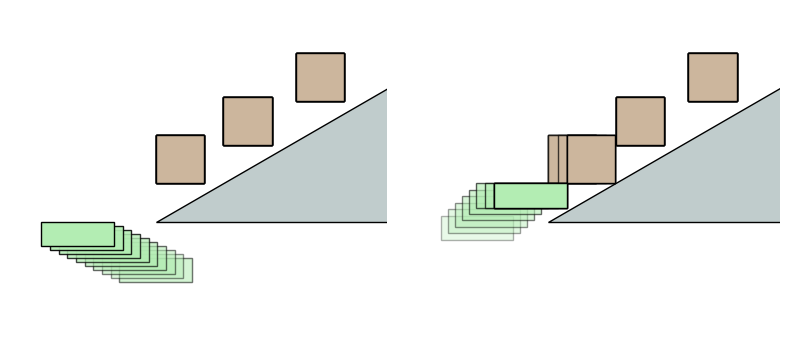

In [18]:
cg.plot_current_solution()

In [19]:
len(sol.trajectory)

6

Hypothesis: perhaps it's failing because of some numerical difficults of projecting back to the feasible region exactly, maybe instead of adding a point set, I should instead make a copy of the terminal vertex set, with a bounding box constraint 